Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'M', 'F'],
      dtype='object')
['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
                  State  TotalPop   Hispanic      White      Black     Native  \
0               Alabama   4830620   3.751616  61.878656  31.252976   0.453231   
1                Alaska    733375   5.909581  60.910180   2.848503  16.391018   
2               Arizona   6641928  29.565921  57.120000   3.850987   4.355066   
3              Arkansas   2958208   6.215474  71.137810  18.968759   0.522920   
4            California  38421464  37.291875  40.215789   5.677396   0.405292   
5              Colorado   5278906  20.784380  69.895572   3.546377   0.573833   
6           Connecticut   3593222  15.604831  67.677053  10.348068   0.126208   
7              Delaware    926454   8.824766  64.632710  20.743925   0.259813   
8  District of Columbia    647484   9.165922 

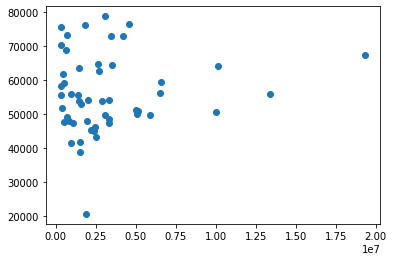

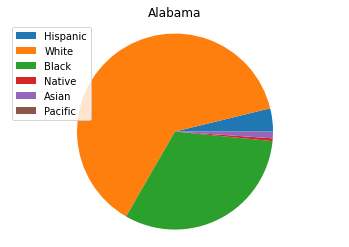

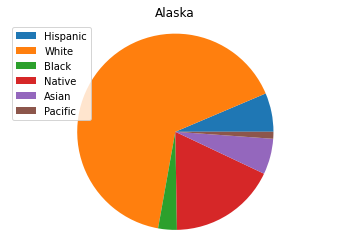

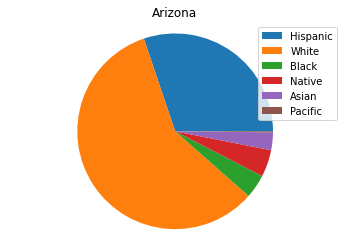

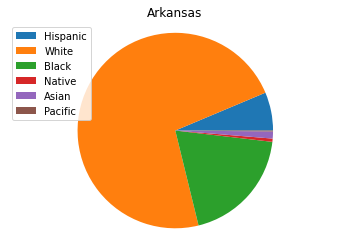

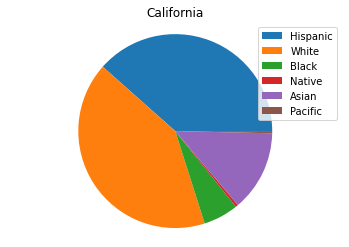

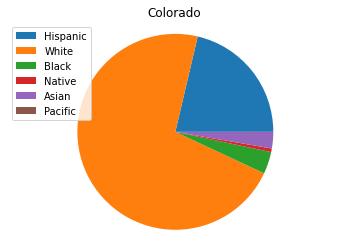

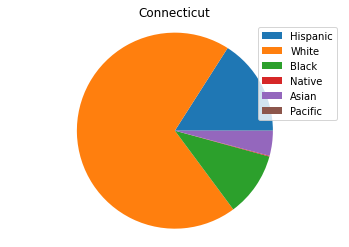

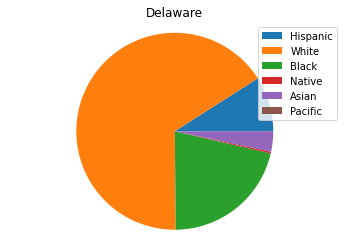

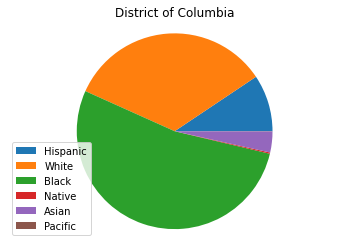

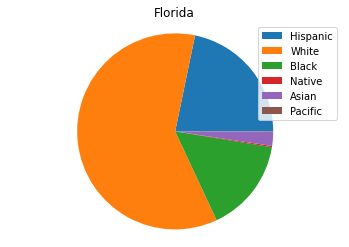

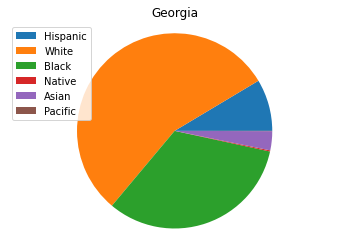

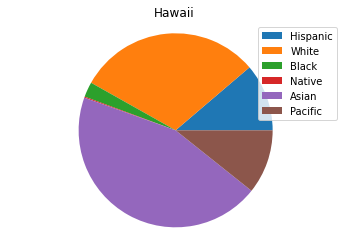

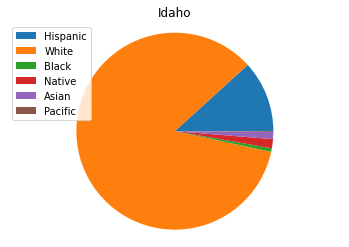

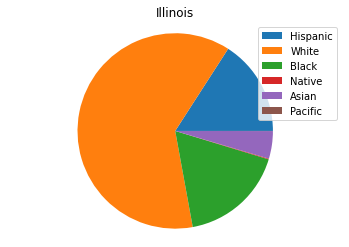

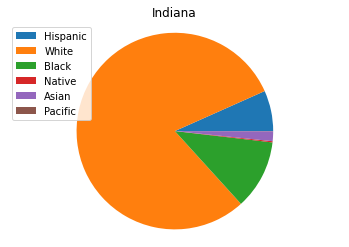

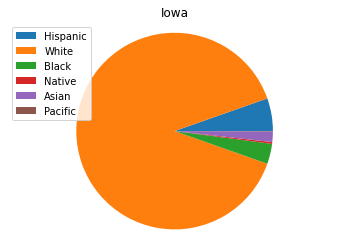

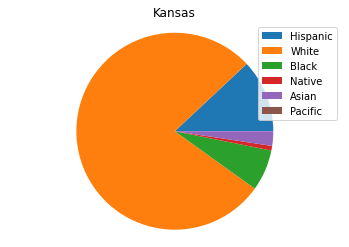

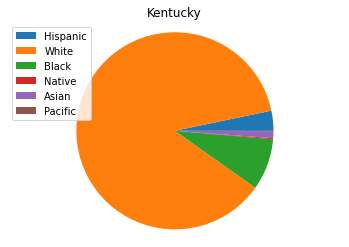

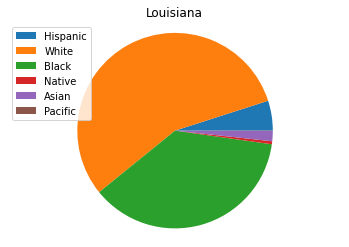

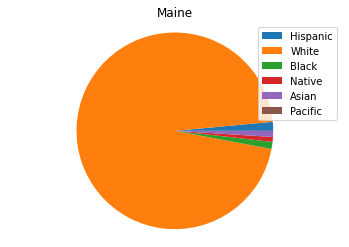

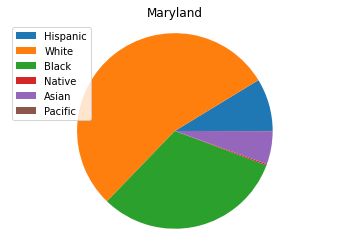

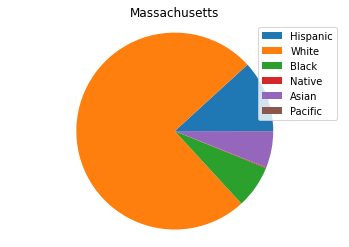

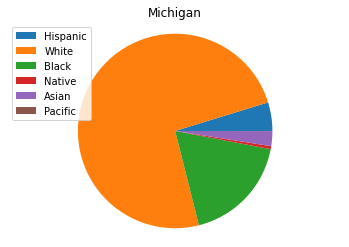

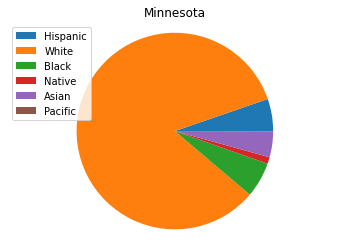

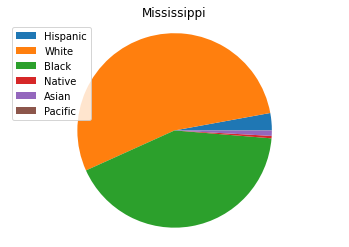

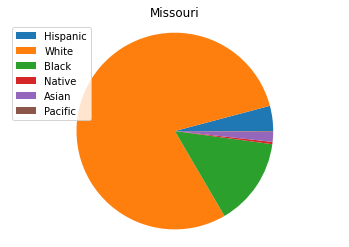

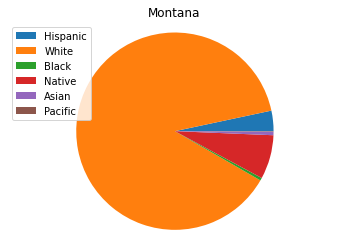

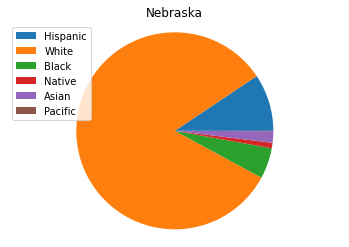

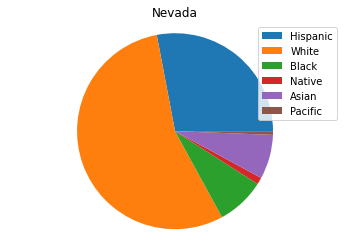

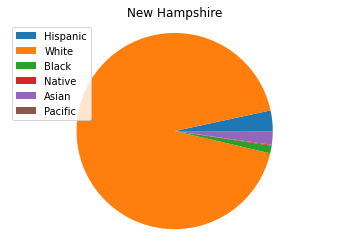

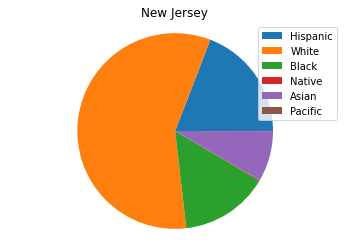

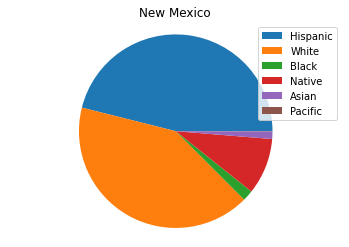

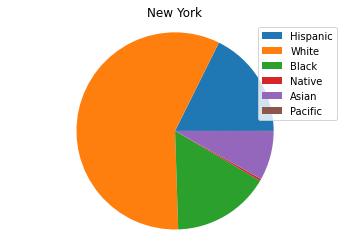

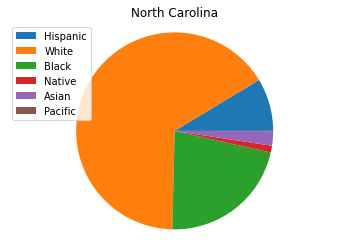

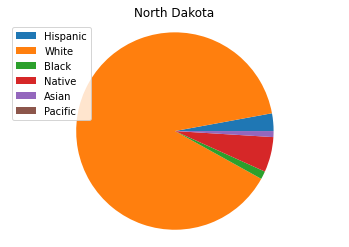

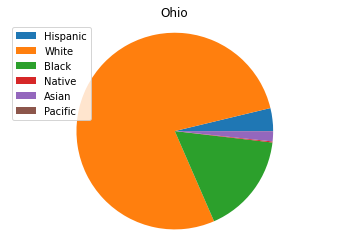

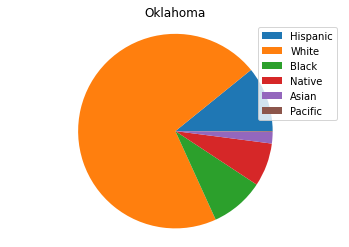

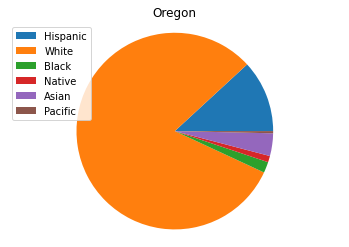

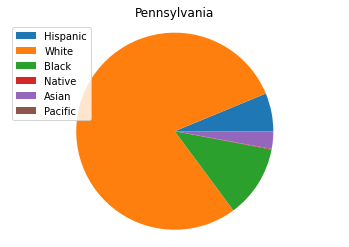

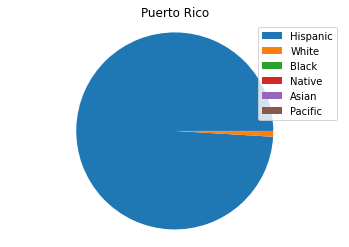

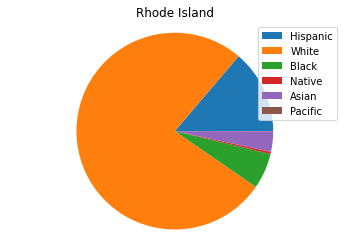

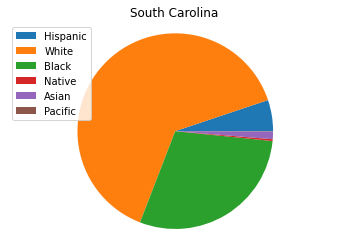

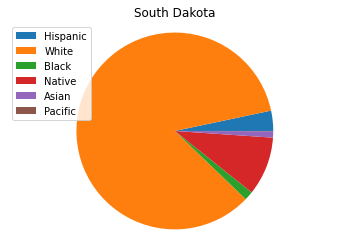

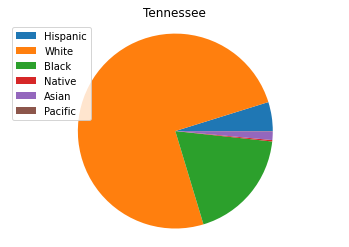

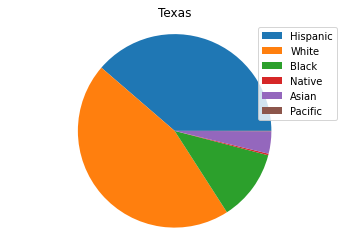

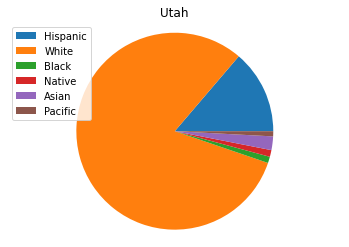

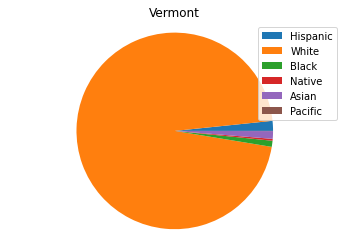

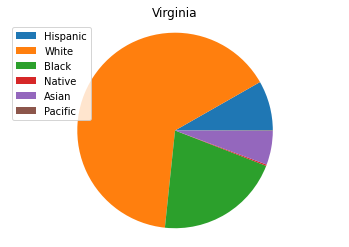

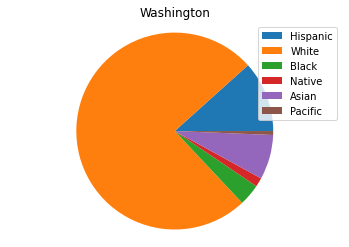

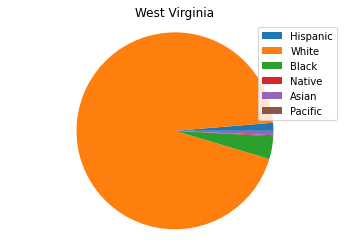

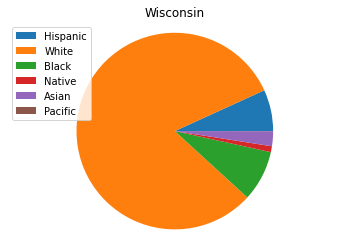

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import pickle

### Pasting together different files into single DF
# census_files = glob.glob("states*.csv")
# census_list = [
#  pd.read_csv(filename) for filename in census_files]
# us_census = pd.concat(census_list)
us_census = pd.read_csv("us_census.csv")
print(us_census.columns)

### Removing unnecessary column, dropping duplicates
us_census.drop(["Unnamed: 0"], axis=1, inplace=True)
us_census.drop_duplicates(inplace=True)
us_census.reset_index(drop=True, inplace=True)

### Fixing the data types

#### Income
us_census["Income"] = pd.to_numeric(us_census["Income"].replace("\$", "", regex=True))

#### Race
race_names = (us_census.loc[:, "Hispanic":"Pacific"].columns).to_list()
print(race_names)
for race in race_names:
  us_census[race] = pd.to_numeric(us_census[race].replace("\%", "", regex=True))
us_census["Pacific"] = us_census["Pacific"].fillna(0)

#### Gender
us_census["M"], us_census["F"] = zip(*us_census.apply(
  lambda row: tuple(pd.to_numeric(re.sub("[MF]", "", value)) for value in row["GenderPop"].split("_")),
  axis = 1
))
us_census["F"] = us_census["F"].fillna(us_census.apply(
  lambda row: row["TotalPop"] - row["M"],
  axis = 1
))

print(us_census.head(10))

### Draw plot
plt.scatter(us_census["F"], us_census["Income"])
plt.show()
plt.close()

### Draw pie charts for races in each state
def draw_pies():
  for i in range(len(us_census["State"])):
    plt.pie(
      us_census.loc[i, "Hispanic":"Pacific"])
    plt.title(us_census.loc[i, "State"])
    plt.legend(race_names)
    plt.axis('equal')
    plt.show()
    plt.close()

draw_pies()

# us_census.to_csv("us_census.csv")
# pickle.dump(us_census, open("us_census.p", "wb"))

In [10]:
print(us_census.sort_values(by="Native", ascending=False).head(10))

           State  TotalPop   Hispanic      White     Black     Native  \
1         Alaska    733375   5.909581  60.910180  2.848503  16.391018   
42  South Dakota    843190   3.239640  82.500901  1.423874   9.417568   
31    New Mexico   2084117  45.282932  40.697992  1.755020   9.248594   
26       Montana   1014699   3.268889  86.415556  0.429259   7.060741   
36      Oklahoma   3849733  10.079904  66.059426  8.314737   6.716842   
34  North Dakota    721640   2.832683  87.448293  1.284390   5.651220   
2        Arizona   6641928  29.565921  57.120000  3.850987   4.355066   
12         Idaho   1616547  11.505369  83.136242  0.566779   1.468121   
48    Washington   6985464  11.140969  72.038408  3.384429   1.410727   
28        Nevada   2798636  27.100884  53.239323  7.739617   1.087187   

       Asian   Pacific        Income          GenderPop        M          F  
1   5.450299  1.058683  70354.743902    384160M_349215F   384160   349215.0  
42  1.019369  0.041892  51805.405405    